In [1]:
# 基础包
import cv2 #opencv读取的格式是BGR
import numpy as np
import matplotlib.pyplot as plt#Matplotlib是RGB
%matplotlib inline 

In [2]:
# 用matplot显示opencv读取的图片
def plt_show(img):
    # opencv读取的图片是BRG通道，matplotlib读取的图片是RGB通道
    cv_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()

## 图像IO

In [3]:
img=cv2.imread('imgs/cat.jpg')
type(img),img.shape,img.dtype

(numpy.ndarray, (414, 500, 3), dtype('uint8'))

In [4]:
gray_img=cv2.imread('imgs/cat.jpg',cv2.IMREAD_GRAYSCALE)
type(gray_img),gray_img.shape,gray_img.dtype

(numpy.ndarray, (414, 500), dtype('uint8'))

In [5]:
#保存
cv2.imwrite('imgs/mycat.png',img)

True

In [6]:
# 对显示图片进行封装
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(delay=0) # 无限制的等待用户按键
    cv2.destroyAllWindows()
# 用matplotlib将图片显示到notebook

### 截取部分图像数据

In [7]:
img=cv2.imread('imgs/cat.jpg')
cat=img[0:50,0:200]

### 颜色通道拆分split和合并merge

In [8]:
b,g,r=cv2.split(img)
r.shape

(414, 500)

In [9]:
img=cv2.merge((b,g,r))
img.shape

(414, 500, 3)

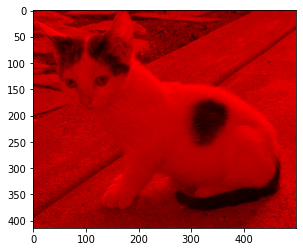

In [10]:
# 只保留R
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,1] = 0
plt_show(cur_img)

### 边界填充

In [11]:
top_size,bottom_size,left_size,right_size = (50,50,50,50)

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size,cv2.BORDER_CONSTANT, value=0)

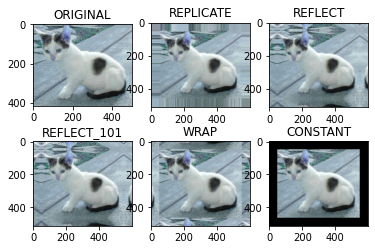

In [12]:
import matplotlib.pyplot as plt
plt.subplot(231), plt.imshow(img, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')

plt.show()

- BORDER_REPLICATE：复制法，也就是复制最边缘像素。
- BORDER_REFLECT：反射法，对感兴趣的图像中的像素在两边进行复制例如：fedcba|abcdefgh|hgfedcb   
- BORDER_REFLECT_101：反射法，也就是以最边缘像素为轴，对称，gfedcb|abcdefgh|gfedcba
- BORDER_WRAP：外包装法cdefgh|abcdefgh|abcdefg  
- BORDER_CONSTANT：常量法，常数值填充。

### 数值计算

In [13]:
img_cat=cv2.imread('imgs/cat.jpg')
img_dog=cv2.imread('imgs/dog.jpg')

In [14]:
img_cat2= img_cat*2
img_cat[:5,:,0]

array([[142, 146, 151, ..., 156, 155, 154],
       [108, 112, 118, ..., 155, 154, 153],
       [108, 110, 118, ..., 156, 155, 154],
       [139, 141, 148, ..., 156, 155, 154],
       [153, 156, 163, ..., 160, 159, 158]], dtype=uint8)

In [15]:
img_cat2[:5,:,0]

array([[ 28,  36,  46, ...,  56,  54,  52],
       [216, 224, 236, ...,  54,  52,  50],
       [216, 220, 236, ...,  56,  54,  52],
       [ 22,  26,  40, ...,  56,  54,  52],
       [ 50,  56,  70, ...,  64,  62,  60]], dtype=uint8)

In [16]:
#相当于% 256
(img_cat + img_cat2)[:5,:,0] 

array([[170, 182, 197, ..., 212, 209, 206],
       [ 68,  80,  98, ..., 209, 206, 203],
       [ 68,  74,  98, ..., 212, 209, 206],
       [161, 167, 188, ..., 212, 209, 206],
       [203, 212, 233, ..., 224, 221, 218]], dtype=uint8)

In [17]:
# 大于255的设置为255
cv2.add(img_cat,img_cat2)[:5,:,0]

array([[170, 182, 197, ..., 212, 209, 206],
       [255, 255, 255, ..., 209, 206, 203],
       [255, 255, 255, ..., 212, 209, 206],
       [161, 167, 188, ..., 212, 209, 206],
       [203, 212, 233, ..., 224, 221, 218]], dtype=uint8)

### 图像融合

In [18]:
img_cat + img_dog

ValueError: operands could not be broadcast together with shapes (414,500,3) (429,499,3) 

In [19]:
img_cat.shape,img_dog.shape

((414, 500, 3), (429, 499, 3))

In [20]:
# 尺度改变
img_dog = cv2.resize(img_dog, (500, 414))
img_dog.shape

(414, 500, 3)

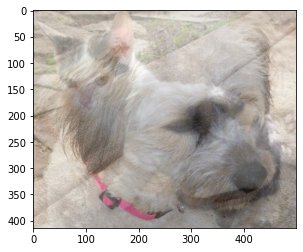

In [21]:
res = cv2.addWeighted(img_cat, 0.4, img_dog, 0.6, 0)
plt_show(res)

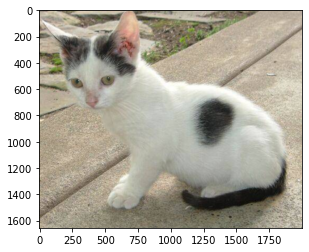

In [22]:
res = cv2.resize(img, (0, 0), fx=4, fy=4)
plt_show(res)

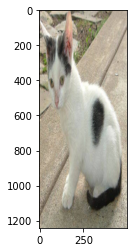

In [23]:
res = cv2.resize(img, (0, 0), fx=1, fy=3)
plt_show(res)

## 视频IO

- cv2.VideoCapture可以捕获摄像头，用数字来控制不同的设备，例如0,1。
- 如果是视频文件，直接指定好路径即可。

In [24]:
vc = cv2.VideoCapture('imgs/test.mp4')
vc.isOpened()

True

In [25]:
# 检查是否打开正确
if vc.isOpened(): 
    ret, frame = vc.read()
vc.isOpened(),ret

(True, True)

In [ ]:
while ret:
    ret, frame = vc.read()
    if ret == True:
        gray = cv2.cvtColor(frame,  cv2.COLOR_BGR2GRAY)
        cv2.imshow('result', gray)
        if cv2.waitKey(100) & 0xFF == 27:
            break
vc.release()
cv2.destroyAllWindows()